In [2]:
#Importamos las librerias necesarias:
import pandas as pd

import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [3]:
#Creamos una lista vacia que en el trascurso de este notebook rellenaremos con nombres de cursos exitosos para tener en cuenta.
CursosRecomendados = []

In [4]:
#Para importar el Dataset:
Coursera = pd.read_csv("Datasets/Coursera.csv")

Coursera

Coursera: Analisis general

In [5]:
Coursera

,name,institution,course_url,course_id,Rating Promedio,Cantidad Votos
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.74,12677
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.82,1460
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.93,8199
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.77,12055
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.82,33
...,...,...,...,...,...,...
599,Hacia una práctica constructivista en el aula,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/aulaconstructiv...,aulaconstructivista,4.91,569
600,Hypothesis-Driven Development,University of Virginia,https://www.coursera.org/learn/uva-darden-agil...,uva-darden-agile-testing,4.50,106
601,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,3.50,8
602,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,4.61,408


In [6]:
#Para ver info de Coursera:
#Hay un total de 604 filas y ninguna columna tiene elementos nulo.
Coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             604 non-null    object 
 1   institution      604 non-null    object 
 2   course_url       604 non-null    object 
 3   course_id        604 non-null    object 
 4   Rating Promedio  604 non-null    float64
 5   Cantidad Votos   604 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.4+ KB


In [7]:
#Para ver describe de Coursera:
#Vemos que el promedio de rating es 4,62 con una std de 0,39 y el promedio de cantidad de votaciones es 860,8 con una std de 1608,6.
Coursera.describe()

,Rating Promedio,Cantidad Votos
count,604.000000,604.000000
mean,4.619801,860.839404
std,0.394430,1608.604971
min,1.000000,1.000000
25%,4.550000,132.750000
50%,4.720000,387.500000
75%,4.812500,847.750000
max,5.000000,15226.000000


Coursera: Rating Promedio General

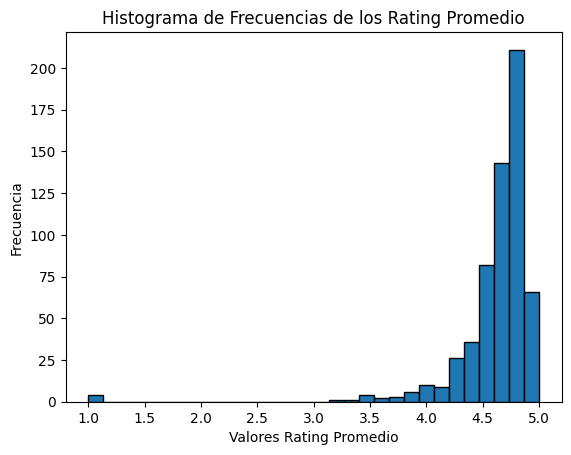

In [8]:
# Para ver un histograma de frecuencias de los Rating Promedio:
#Vemos que en general las valoraciones son positivas, la distribucion es sesgada hacia la derecha.
plt.hist(Coursera["Rating Promedio"], bins=30, edgecolor='black')

plt.xlabel('Valores Rating Promedio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de los Rating Promedio')

plt.show()

In [9]:
#Para ver los cursos con mejor rating:
#Vemos que algunos tienen 5 puntos de rating en promedio pero basandose en muy pocas opiniones.
Coursera.sort_values(by="Rating Promedio", ascending=False).head(5)

,name,institution,course_url,course_id,Rating Promedio,Cantidad Votos
586,Removing Barriers to Change,University of Pennsylvania,https://www.coursera.org/learn/removing-barrie...,removing-barriers-to-change,5.00,8
487,Building Modern Python Applications on AWS,Amazon Web Services,https://www.coursera.org/learn/building-modern...,building-modern-python-applications-on-aws,5.00,1
104,Entreprise et changement climatique,ESSEC Business School,https://www.coursera.org/learn/entreprise-chan...,entreprise-changement-climatique,5.00,2
50,How to Manage a Remote Team,GitLab,https://www.coursera.org/learn/remote-team-man...,remote-team-management,5.00,5
353,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,https://www.coursera.org/learn/legaltech,legaltech,4.97,125


Coursera: Rating Promedio a cursos con mas de 750 opiniones.

In [10]:
#Para ver los cursos con mejor rating con mas de 750 opiniones:
#Para que el numero obtenido como promedio de rating sea mas legitimo, establecemos un minimo de 750 opiniones como condicion.

Segmentacion1C = Coursera[Coursera["Cantidad Votos"]>750].sort_values(by='Rating Promedio', ascending=False)

In [11]:
#Para ver la relacion de la cantidad de elementos del segmento con el total:
#Vemos que un poco mas del 29% de los cursos tienen mas de 750 opiniones.
len(Segmentacion1C)/len(Coursera)

0.2913907284768212

In [12]:
#Para ver un describe del segmento:
#Vemos que la media de rating promedio aumento 4,67 y el std disminuyo a la mitad aproximadamente.
Segmentacion1C.describe()

,Rating Promedio,Cantidad Votos
count,176.000000,176.000000
mean,4.666477,2280.562500
std,0.204297,2439.017823
min,3.710000,755.000000
25%,4.567500,993.500000
50%,4.720000,1382.000000
75%,4.810000,2591.500000
max,4.930000,15226.000000


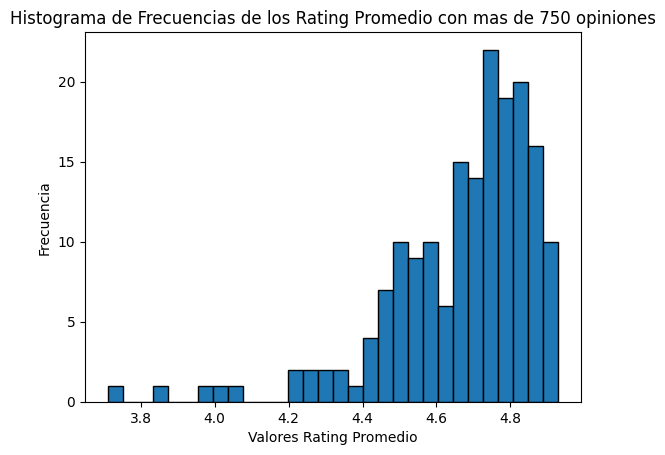

In [13]:
# Para ver un histograma de frecuencias de los Rating Promedio con mas de 750 opiniones:
plt.hist(Segmentacion1C["Rating Promedio"], bins=30, edgecolor='black')

plt.xlabel('Valores Rating Promedio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de los Rating Promedio con mas de 750 opiniones')

plt.show()

In [14]:
#Para ver los cursos del segmento1 con mejor rating:
#Los mismos podrian ser tenidos en cuenta para la nueva plataforma.
#Podemos ver que los topicos son variados.

Segmentacion1C.head(10)

,name,institution,course_url,course_id,Rating Promedio,Cantidad Votos
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.93,8199
18,Writing in the Sciences,Stanford University,https://www.coursera.org/learn/sciwrite,sciwrite,4.92,1286
424,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,https://www.coursera.org/learn/aprendiendo-a-a...,aprendiendo-a-aprender,4.92,3090
234,Introduction to Classical Music,Yale University,https://www.coursera.org/learn/introclassicalm...,introclassicalmusic,4.91,792
244,Teach English Now! Foundational Principles,Arizona State University,https://www.coursera.org/learn/english-principles,english-principles,4.91,2678
122,Excel Skills for Business: Intermediate I,Macquarie University,https://www.coursera.org/learn/excel-intermedi...,excel-intermediate-1,4.90,2194
17,"Brand Management: Aligning Business, Brand and...",London Business School,https://www.coursera.org/learn/brand,brand,4.90,1091
155,Learn to Speak Korean 1,Yonsei University,https://www.coursera.org/learn/learn-speak-kor...,learn-speak-korean1,4.90,1195
324,Fundamentos de Finanzas Empresariales,Universidad de los Andes,https://www.coursera.org/learn/finanzas-empres...,finanzas-empresariales,4.90,1442
21,Excel Skills for Business: Essentials,Macquarie University,https://www.coursera.org/learn/excel-essentials,excel-essentials,4.89,7377


In [15]:
#Para agregar los cursos a nuestra lista de recomendados:
for i in range(10):
    if Segmentacion1C.name.iloc[i] not in (CursosRecomendados):
        CursosRecomendados.append(Segmentacion1C.name.iloc[i])

Coursera: Rating Promedio a cursos con mas de 1500 opiniones.

In [16]:
#Para ver los cursos con mejor rating con mas de 1500 opiniones:
#Para analizar el segmento con mas demanda del mercado.

Segmentacion2C = Coursera[Coursera["Cantidad Votos"]>1500].sort_values(by='Rating Promedio', ascending=False)

In [17]:
#Para ver la relacion de la cantidad de elementos del segmento con el total:
#Vemos que un poco mas del 12% de los cursos tienen mas de 1500 opiniones.
len(Segmentacion2C)/len(Coursera)

0.12582781456953643

In [18]:
#Para ver un describe del segmento:
#Vemos que la media sigue en 4,68 y el std disminuyo a 0,18.
Segmentacion2C.describe()

,Rating Promedio,Cantidad Votos
count,76.000000,76.000000
mean,4.679211,3873.157895
std,0.179932,3047.993662
min,4.010000,1511.000000
25%,4.570000,1960.000000
50%,4.730000,2771.000000
75%,4.800000,4590.250000
max,4.930000,15226.000000


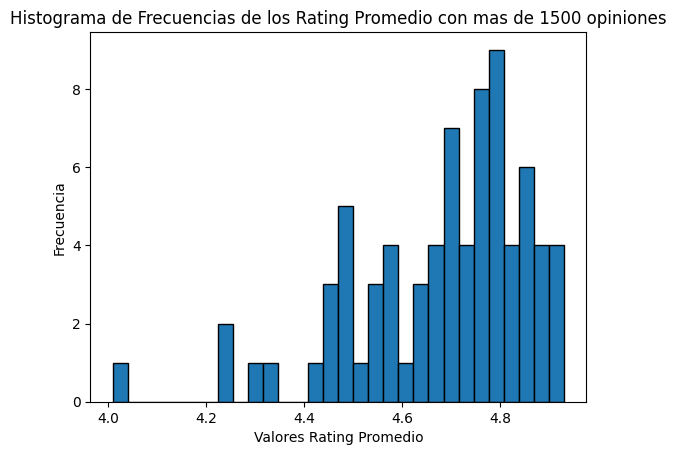

In [19]:
# Para ver un histograma de frecuencias de los Rating Promedio con mas de 1500 opiniones:
plt.hist(Segmentacion2C["Rating Promedio"], bins=30, edgecolor='black')

plt.xlabel('Valores Rating Promedio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de los Rating Promedio con mas de 1500 opiniones')

plt.show()

In [20]:
#Para ver los cursos del segmento2 con mejor rating:
#Los topicos cambiar a cuestiones mas tecnicas.
#Tambien deberian ser tenidos en cuenta para la nueva plataforma.
#Entre ellos encontramos aprendiendo a aprender y the science of well being, los cuales tambien se encontraban en el segmento anterior.
#Tambien encontramos cursos sobre excel, ingles, koreano y psicologia.

Segmentacion2C.head(10)

,name,institution,course_url,course_id,Rating Promedio,Cantidad Votos
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.93,8199
424,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,https://www.coursera.org/learn/aprendiendo-a-a...,aprendiendo-a-aprender,4.92,3090
244,Teach English Now! Foundational Principles,Arizona State University,https://www.coursera.org/learn/english-principles,english-principles,4.91,2678
122,Excel Skills for Business: Intermediate I,Macquarie University,https://www.coursera.org/learn/excel-intermedi...,excel-intermediate-1,4.90,2194
21,Excel Skills for Business: Essentials,Macquarie University,https://www.coursera.org/learn/excel-essentials,excel-essentials,4.89,7377
55,English for Career Development,University of Pennsylvania,https://www.coursera.org/learn/careerdevelopment,careerdevelopment,4.87,2953
38,Primeros Auxilios Psicológicos (PAP),Universitat Autònoma de Barcelona,https://www.coursera.org/learn/pap,pap,4.87,2697
29,First Step Korean,Yonsei University,https://www.coursera.org/learn/learn-korean,learn-korean,4.87,5993
303,Gestión Empresarial Exitosa para Pymes,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/gestionempresar...,gestionempresarialpyme,4.86,1764
6,Introduction to Psychology Yale,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology,4.85,3015


In [21]:
#Para agregar los cursos a nuestra lista de recomendados:
for i in range(10):
    if Segmentacion2C.name.iloc[i] not in (CursosRecomendados):
        CursosRecomendados.append(Segmentacion2C.name.iloc[i])

Coursera: Rating Promedio a Instituciones.

In [22]:
#En este apartado tendremos en cuenta las instituciones y sus respectivos cursos.

#Para ver la cantidad de cursos y los rating promedio de las instituciones:

PromedioInst = Coursera.groupby("institution")["Rating Promedio"].mean()

ConteoInst = Coursera["institution"].value_counts()

ConteoInst = ConteoInst.sort_index()

Instituciones = pd.DataFrame({"institucion": PromedioInst.index, "Rating Promedio": PromedioInst.values, "Cantidad Cursos": ConteoInst.values})

In [23]:
#Para ver la cantidad de cursos de cada institucion:
#Vemos que el maximo es de 43 cursos para la Universidad de Pensilvania.
Instituciones.sort_values("Cantidad Cursos", ascending=False).head(10)

,institucion,Rating Promedio,Cantidad Cursos
116,University of Pennsylvania,4.655349,43
113,University of Michigan,4.674516,31
17,Duke University,4.628261,23
30,Google Cloud,4.491818,22
34,IBM,4.438889,18
120,University of Virginia,4.694706,17
127,Yale University,4.864706,17
16,DeepLearning.AI,4.436875,16
99,"University of California, Irvine",4.583333,15
108,University of Illinois at Urbana-Champaign,4.530714,14


In [24]:
Instituciones["Rating Promedio"] = Instituciones["Rating Promedio"].round(3)

In [25]:
Instituciones.to_csv("Datasets/InstitucionesCoursera.csv", index=False)

Coursera: Rating Promedio a Instituciones con mas de 10 cursos.

In [26]:
#Para ver los mejores rating de aquellas instituciones que tienen al menos 10 cursos:
Instituciones10Cursos = Instituciones[Instituciones["Cantidad Cursos"]>10].sort_values("Rating Promedio", ascending=False).head(10)

Instituciones10Cursos

,institucion,Rating Promedio,Cantidad Cursos
127,Yale University,4.865,17
120,University of Virginia,4.695,17
113,University of Michigan,4.675,31
116,University of Pennsylvania,4.655,43
41,Johns Hopkins University,4.653,13
110,University of London,4.632,12
17,Duke University,4.628,23
98,"University of California, Davis",4.626,13
99,"University of California, Irvine",4.583,15
108,University of Illinois at Urbana-Champaign,4.531,14


In [27]:
#Para ver 3 cursos de las primeras 5 instituciones con mejor promedio y con mas de 10 cursos del segmento 1(mas de mil opiniones):
Cursos1 = []

for i in Instituciones10Cursos["institucion"].head(5):
    print(i)
    print(Segmentacion1C[Segmentacion1C["institution"]==i]["name"].head(3))
    for k in Segmentacion1C[Segmentacion1C["institution"]==i]["name"].head(3):
        Cursos1.append(k)

Yale University
2                              The Science of Well-Being
234                      Introduction to Classical Music
22     Introduction to Negotiation: A Strategic Playb...
Name: name, dtype: object
University of Virginia
15     Fundamentals of Project Planning and Management
176                     Design Thinking for Innovation
47                                 Marketing Analytics
Name: name, dtype: object
University of Michigan
27                                Python Data Structures
227                 Inspiring and Motivating Individuals
14     Successful Negotiation: Essential Strategies a...
Name: name, dtype: object
University of Pennsylvania
256            English for Business and Entrepreneurship
55                        English for Career Development
77     Positive Psychology: Martin E. P. Seligman’s V...
Name: name, dtype: object
Johns Hopkins University
11                         Psychological First Aid
78           Introduction to the Biology of Cancer
20

In [28]:
#Para agregar los cursos a nuestra lista de recomendados:
for curso in Cursos1:
    if curso not in (CursosRecomendados):
        CursosRecomendados.append(curso)

Coursera: Cursos mas populares.

In [29]:
#Para ver los cursos que tienen mas cantidad de opiniones:
#Los cursos mas populares son python, machine learning y deep learning.
CantidadVotos = Coursera.sort_values(by='Cantidad Votos', ascending=False).head(10)
CantidadVotos

,name,institution,course_url,course_id,Rating Promedio,Cantidad Votos
7,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,4.58,15226
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.74,12677
12,Neural Networks and Deep Learning,DeepLearning.AI,https://www.coursera.org/learn/neural-networks...,neural-networks-deep-learning,4.77,12292
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.77,12055
24,Learning How to Learn: Powerful mental tools t...,University of California San Diego,https://www.coursera.org/learn/learning-how-to...,learning-how-to-learn,4.80,11871
27,Python Data Structures,University of Michigan,https://www.coursera.org/learn/python-data,python-data,4.85,11422
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.93,8199
13,What is Data Science?,IBM,https://www.coursera.org/learn/what-is-datasci...,what-is-datascience,4.62,7397
9,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone,4.85,7386
21,Excel Skills for Business: Essentials,Macquarie University,https://www.coursera.org/learn/excel-essentials,excel-essentials,4.89,7377


In [30]:
#Para agregar los cursos a nuestra lista de recomendados:
for i in range(10):
    if CantidadVotos.name.iloc[i] not in (CursosRecomendados):
        CursosRecomendados.append(CantidadVotos.name.iloc[i])

In [31]:
#En total, los cursos destacados de nuestro analisis son 34:
len(CursosRecomendados)

34

In [32]:
#Los cursos recomendados en cuestion:
#Los mismos pueden ser usados como referencia al momento de generar los cursos de la plataforma.
CursosRecomendados

['The Science of Well-Being',
 'Writing in the Sciences',
 'Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn)',
 'Introduction to Classical Music',
 'Teach English Now! Foundational Principles',
 'Excel Skills for Business: Intermediate I',
 'Brand Management: Aligning Business, Brand and Behaviour',
 'Learn to Speak Korean 1',
 'Fundamentos de Finanzas Empresariales',
 'Excel Skills for Business: Essentials',
 'English for Career Development',
 'Primeros Auxilios Psicológicos (PAP)',
 'First Step Korean',
 'Gestión Empresarial Exitosa para Pymes',
 'Introduction to Psychology Yale',
 'Introduction to Negotiation: A Strategic Playbook for Becoming a Principled and Persuasive Negotiator',
 'Fundamentals of Project Planning and Management',
 'Design Thinking for Innovation',
 'Marketing Analytics',
 'Python Data Structures',
 'Inspiring and Motivating Individuals',
 'Successful Negotiation: Essential Strategies and 

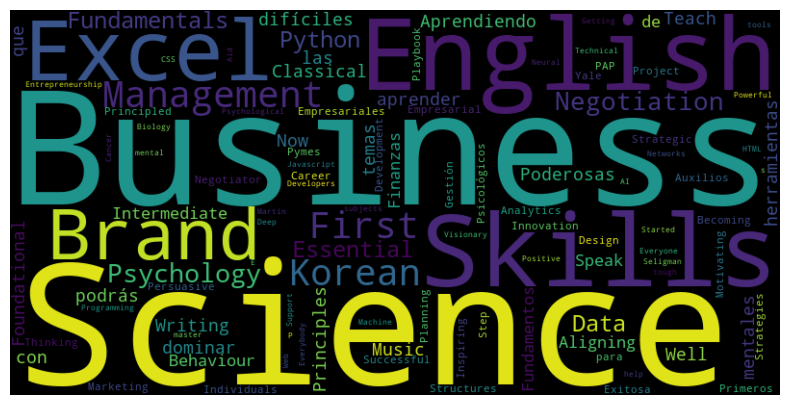

In [34]:
#Para generar una nube de palabras con los nombres de los cursos recomendados:
#Para concatenar:
texto = ' '.join(CursosRecomendados)

#Para eliminar palabras que se repiten y no hacen al contenido:
palabras_a_eliminar = ["Introduction", "Learning", "Learn"]

for palabra in palabras_a_eliminar:
    texto = texto.replace(palabra, "")

# Para crear el objeto WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(texto)

# Para mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()